In [1]:
global ROOT_DIR
ROOT_DIR = '/gpfs/commons/groups/gursoy_lab/aelhussein/ot_cost/otcost_fl_rebase'
RESULTS_DIR = f'{ROOT_DIR}/results/SampleSize'

In [7]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(f'{ROOT_DIR}/code/')
sys.path.append(f'{ROOT_DIR}/code/Synthetic/')
import OTCost as ot
import splitData as sd
import dataCreator as dc
import importlib
importlib.reload(ot)
importlib.reload(sd)
importlib.reload(dc)
from sklearn.preprocessing import normalize, StandardScaler
import copy
from emnist import extract_training_samples

In [2]:
private = False

## 2D synthetic data

In [ ]:
DATASET = 'Synthetic'

In [106]:
sample_sizes = [100, 200, 500, 1000, 2000, 4000]
fracs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
results = {}
for size in sample_sizes:
    results[size] = {}
    for i in fracs:
        ##create data
        data, label = dc.non_iid_creator2D(i, size)
        ## calculate cost
        Synthetic_OTCost_label = ot.OTCost(DATASET, data, label)
        cost = Synthetic_OTCost_label.calculate_ot_cost()
        results[size][i] = cost

cost: 0.1450129519
cost: 0.2034854360
cost: 0.2580778795
cost: 0.3249508628
cost: 0.4135228630
cost: 0.4914471332
cost: 0.5755895674
cost: 0.6500020600
cost: 0.7165589558
cost: 0.7913204641
cost: 0.8754068889
cost: 0.1404261395
cost: 0.1774026060
cost: 0.2317347410
cost: 0.2891476977
cost: 0.3485203190
cost: 0.4168093111
cost: 0.5415545617
cost: 0.6258019661
cost: 0.7083120959
cost: 0.7514028872
cost: 0.8733779512
cost: 0.1338413004
cost: 0.1855884353
cost: 0.2441115752
cost: 0.3040965483
cost: 0.3714077583
cost: 0.4384815236
cost: 0.5137242275
cost: 0.5922213881
cost: 0.6786621081
cost: 0.7716388052
cost: 0.8841557507
cost: 0.1372566418
cost: 0.1780203862
cost: 0.2319423636
cost: 0.2899196357
cost: 0.3521650543
cost: 0.4204625588
cost: 0.4954391567
cost: 0.5772875516
cost: 0.6634553247
cost: 0.7632790255
cost: 0.8767043802
cost: 0.1382017132
cost: 0.1818238757
cost: 0.2320456739
cost: 0.2874770149
cost: 0.3486954221
cost: 0.4156097326
cost: 0.4884118518
cost: 0.5675283378
cost: 0.6558

In [107]:
results_df = pd.DataFrame.from_dict(results, orient = 'index').T
melt_df = pd.melt(results_df.reset_index(), id_vars='index', var_name='columns', value_name='values')

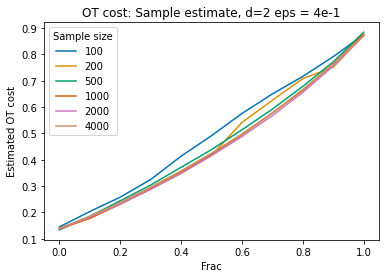

In [109]:
sns.lineplot(data = melt_df, x = 'index', y = 'values', hue = 'columns', palette="colorblind")
plt.xlabel('Frac')
plt.ylabel(f'Estimated OT cost')
plt.legend(title = 'Sample size')
plt.title(f'OT cost: Sample estimate, d=2 eps = 4e-1')
plt.show()

## 12D synthetic data

In [ ]:
sample_sizes = [100, 500, 1000, 2000, 4000, 8000]
fracs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
results = {}
for size in sample_sizes:
    results[size] = {}
    for i in fracs:
        ##create data
        data, label = dc.non_iid_creator(i, size)
        ## calculate cost
        Synthetic_OTCost_label = ot.OTCost(DATASET, data, label)
        cost = Synthetic_OTCost_label.calculate_ot_cost()
        results[size][i] = cost

In [3]:
results_df = pd.DataFrame.from_dict(results, orient = 'index').T
results_df.to_csv(f'{RESULTS_DIR}/12D_synthetic.csv')

In [28]:
melt_df = pd.melt(results_df.reset_index(), id_vars='index', var_name='columns', value_name='values')
melt_df['log_samples'] = melt_df['columns'].astype('float')
melt_df['log_samples'] = np.log2(melt_df['log_samples'])


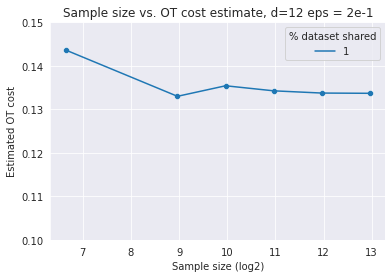

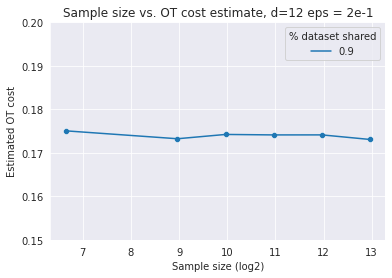

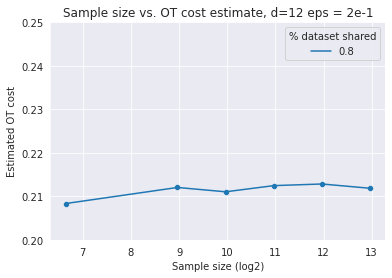

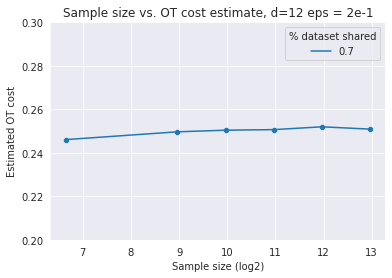

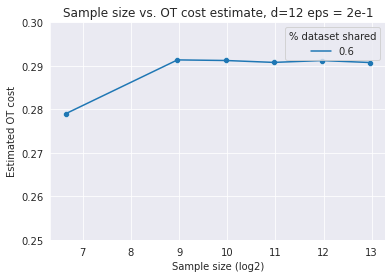

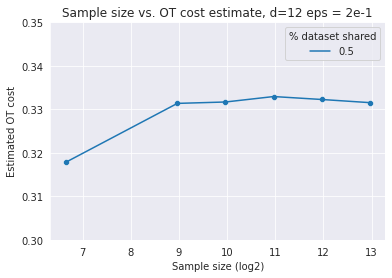

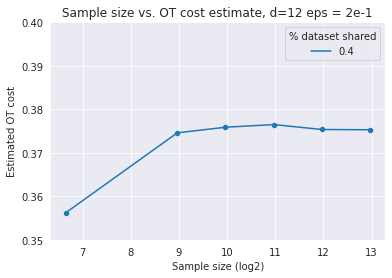

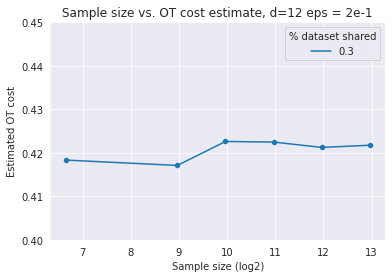

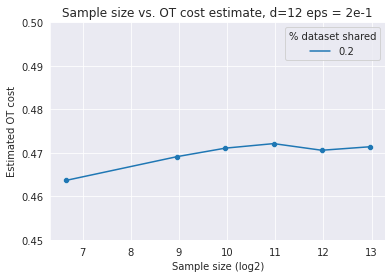

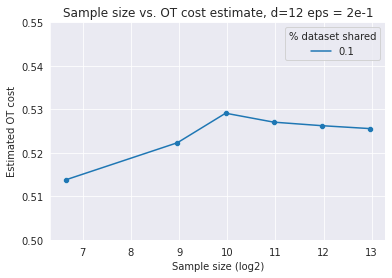

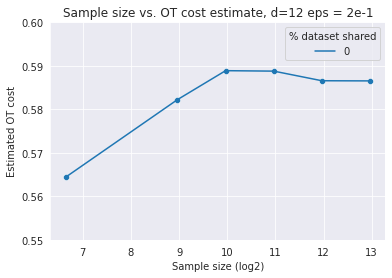

In [31]:
for i in fracs:
    df = melt_df[melt_df['index'] == i]
    sns.set_style("darkgrid")
    sns.scatterplot(data = df, x = 'log_samples', y = 'values', palette="colorblind", markers = 'o')
    sns.lineplot(data = df, x = 'log_samples', y = 'values', palette="colorblind", label = f'{np.round(1 - i, 1)}')
    plt.xlabel('Sample size (log2)')
    plt.ylabel(f'Estimated OT cost')
    
    ##dynamically set the y limit
    y_min = np.floor(np.min(df['values']) /0.05) * 0.05
    y_max = np.ceil(np.max(df['values']) /0.05) * 0.05
    plt.ylim(y_min, y_max)

    plt.legend(title = f'% dataset shared')
    plt.title(f'Sample size vs. OT cost estimate, d=12 eps = 2e-1')
    plt.savefig(f'{path}synthetic_{i}.pdf')
    plt.show()

## synthetic data

In [56]:
def loadData(name, size = 60):
    ##load data
    X = pd.read_csv(f'{ROOT_DIR}/data/Synthetic/{name}.csv', sep = ' ', names = [i for i in range(13)])
    ##merge
    X = X.sample(frac = 1)
    X = X.iloc[:size]
    ##get X and label
    y = X.iloc[:,-1]
    X = X.iloc[:,:-1]
    return X.values,y.values

In [60]:
def dictionaryCreater(X1, y1, X2, y2):
    ##wrangle to dictionary for OT cost calculation
    data, label = {"1": X1, "2": X2}, {"1": np.array(y1).reshape(1,-1)[0], "2": np.array(y2).reshape(1,-1)[0]}
    return data, label

In [63]:
importlib.reload(ot)
cs = = [0.03, 0.10, 0.20, 0.30, 0.40, 0.50]
sizes = [200, 400, 600, 800]
results = {}
for c in cs:
    results[c] = {}
    for size in sizes:
        ## load data
        name1, name2 = f'data_1_{c}',f'data_2_{c}'
        X1, y1 = loadData(name1, size = size)
        X2, y2 = loadData(name2, size = size)

        data, label = dictionaryCreater(X1, y1, X2, y2)
        cost = ot.Synthetic_OTCost_label(data, label)
        results[c][size] = round(cost,2)

cost: 0.0329563751
cost: 0.0266532416
cost: 0.0251882056
cost: 0.0237937992
cost: 0.0952702288
cost: 0.0719685670
cost: 0.0882717260
cost: 0.0943967601
cost: 0.2216527512
cost: 0.2210369675
cost: 0.2275128314
cost: 0.2105049428
cost: 0.2895044813
cost: 0.3014019668
cost: 0.2905030791
cost: 0.3032270205
cost: 0.4162336672
cost: 0.4195851096
cost: 0.3949424015
cost: 0.4012948173
cost: 0.5018066994
cost: 0.4990188476
cost: 0.5068460416
cost: 0.4983929824
cost: 0.5146769054
cost: 0.4920020258
cost: 0.4815080496
cost: 0.4972270991
cost: 0.8295439771
cost: 0.7771718681
cost: 0.7996805681
cost: 0.8009217055
cost: 0.9835420194
cost: 0.9837143725
cost: 0.9835271891
cost: 0.9833441767


In [64]:
df = pd.DataFrame.from_dict(results, orient = 'index')
melt_df = pd.melt(df.iloc[:,:-1])
##taken true from full dataset
melt_df['True'] = list(df.iloc[:,-1].values) * df.iloc[:,:-1].shape[1]
##rename columns
melt_df.columns = ['sample_size', 'Estimated', 'True']

In [65]:
melt_df.to_csv(f'{RESULTS_DIR}/synthetic_data.csv')

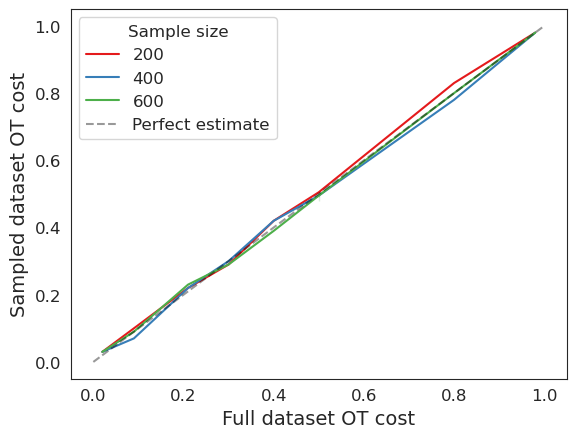

In [66]:
sns.set_style("white")
sns.lineplot(data = melt_df, x = 'True', y = 'Estimated', hue = 'sample_size', palette='Set1')
plt.plot([0.0, 1.0], [0.0, 1.0], linestyle = '--', color = 'black', alpha = 0.4, label = 'Perfect estimate')
plt.xlabel('Full dataset OT cost', fontsize = 14)
plt.ylabel(f'Sampled dataset OT cost', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Sample size', fontsize = 12, title_fontsize = 12)
plt.savefig(f'{RESULTS_DIR}/synthetic.pdf')
plt.show()

## credit data

In [14]:
def loadData(name):
    ##load data
    data = pd.read_csv(f'{ROOT_DIR}/data/Credit/{name}.csv', sep = ' ', names = [i for i in range(29)])
    ##get X and label
    y = data.iloc[:,-1]
    X = data.iloc[:,:-1]
    return X,y

In [15]:
def dictionaryCreater(X1, y1, X2, y2):
    ##wrangle to dictionary for OT cost calculation
    data_, label = {"1": X1, "2": X2}, {"1": np.array(y1).reshape(1,-1)[0], "2": np.array(y2).reshape(1,-1)[0]}
    data= {"1" : normalize(data_['1'], axis = 1, norm = 'l2'), "2" : normalize(data_['2'], axis = 1, norm = 'l2')}
    return data, data_, label

In [16]:
def sampler(X, y, size):
    return X.iloc[:size,:], y.iloc[:size] 

In [20]:
importlib.reload(ot)
cs = [0.12, 0.23, 0.30, 0.41]
sizes = [100, 200, 400, 650]
results = {}
for c in cs:
    results[c] = {}
    for size in sizes:
        ## load data
        name1, name2 =  f'data_1_{c}',f'data_2_{c}'
        X1, y1 = loadData(name1)
        X2, y2 = loadData(name2)

        ##sample
        X1, y1 = sampler(X1, y1, size)
        X2, y2 = sampler(X2, y2, size)

        data, data_, label = dictionaryCreater(X1, y1, X2, y2)
        cost = ot.Credit_OTCost_label(data, label)
        results[c][size] = round(cost,2)

cost: 0.1845201085
cost: 0.1404753535
cost: 0.1143452318
cost: 0.1017596223
cost: 0.2514955671
cost: 0.2310198949
cost: 0.2214165739
cost: 0.2086352263
cost: 0.3463794804
cost: 0.3279822861
cost: 0.3249769744
cost: 0.3168156115
cost: 0.3944431949
cost: 0.3994436138
cost: 0.3948818156
cost: 0.3950355752


In [21]:
df = pd.DataFrame.from_dict(results, orient = 'index')
melt_df = pd.melt(df.iloc[:,:-1])
##taken true from full dataset
melt_df['True'] = list(df.iloc[:,-1].values) * df.iloc[:,:-1].shape[1]
##rename columns
melt_df.columns = ['sample_size', 'Estimated', 'True']

In [26]:
melt_df.to_csv(f'{RESULTS_DIR}/credit_data.csv')

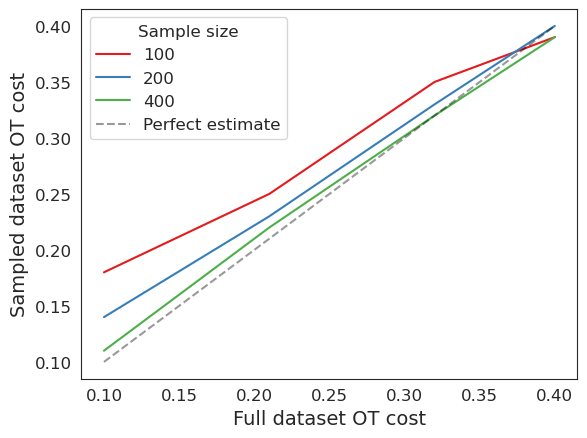

In [24]:
sns.set_style("white")
sns.lineplot(data = melt_df, x = 'True', y = 'Estimated', hue = 'sample_size', palette='Set1')
plt.plot([0.1, 0.4], [0.1, 0.4], linestyle = '--', color = 'black', alpha = 0.4, label = 'Perfect estimate')
plt.xlabel('Full dataset OT cost', fontsize = 14)
plt.ylabel(f'Sampled dataset OT cost', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Sample size', fontsize = 12, title_fontsize = 12)
plt.savefig(f'{RESULTS_DIR}/credit.pdf')
plt.show()



## Weather 

In [39]:
def extractData(df, climates,n = 2000):
    df = df[df['climate'].isin(climates)]
    ind = np.random.choice(df.shape[0], n)
    X = df.iloc[ind, 6:]
    y = df.iloc[ind, 3]
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized, y.values

In [45]:
def dictionaryCreator(df, climates):
    ##wrangle to dictionary for OT cost calculation
    X1, y1 = extractData(df, climates[0],n = 4000)  
    X2, y2 = extractData(df, climates[1],n = 4000)  
    data, label = {"1": X1, "2": X2}, {"1": y1, "2": y2}
    return data, label

In [46]:
def addNoise(data, mean = 0, sigma = 1):
    n,k = data.shape[0], data.shape[1]
    noise = np.random.normal(mean, sigma, size = n*k).reshape(n,k)
    data_ = copy.deepcopy(data)
    data_ += noise
    return data_

def sampler(data, label, num = 500):
    data_, label_  = {}, {}
    for i in data:
        idx = np.random.choice(np.arange(data[i].shape[0]), num, replace=False)
        data_[i] = data[i][idx]
        label_[i] = label[i][idx]
    return data_, label_
## load data
##load dataset
df = pd.read_csv(f'{ROOT_DIR}/data/weather/shifts_canonical_train.csv', nrows = 20000)
df_snow = pd.read_csv(f'{ROOT_DIR}/data/weather/shifts_canonical_eval_out.csv', nrows = 5000)
df = pd.concat([df, df_snow])
df.dropna(inplace = True)

In [48]:
costs = [0.1, 0.2, 0.3, 0.4]
climates = [[['tropical', 'mild temperate'],['tropical', 'mild temperate']],
            [['tropical', 'mild temperate'], ['tropical', 'mild temperate']],
            [['mild temperate','dry'], ['snow', 'dry']],
            [['dry', 'mild temperate'], ['snow']]]
noises = [(0,0), (0,0.6), (0,1), (2,1)]
nums = [100, 200, 300, 400, 500]
results = {}


for climate, ac, noise in zip(climates, costs, noises):
    results[ac] = {}
    for num in nums:
        data, label = dictionaryCreator(df, climate)
        data_, label_ = sampler(data, label, num = num)
        data_['2'] = addNoise(data['2'], mean = noise[0], sigma = noise[1])
        cost = ot.Weather_OTCost_label(data_)
        results[ac][num] = cost

cost: 0.1730159739
cost: 0.1543580166
cost: 0.1517696362
cost: 0.1431823802
cost: 0.1348097759
cost: 0.2307866104
cost: 0.2121978528
cost: 0.2066361601
cost: 0.1948418399
cost: 0.1949447853
cost: 0.2885923280
cost: 0.2727807584
cost: 0.2690643925
cost: 0.2639367583
cost: 0.2625369680
cost: 0.4107835573
cost: 0.3861312647
cost: 0.3737756124
cost: 0.3781761991
cost: 0.3725697575


In [49]:
df = pd.DataFrame.from_dict(results, orient = 'index')
melt_df = pd.melt(df.iloc[:,:-1])
##taken true from full dataset
melt_df['True'] = list(df.iloc[:,-1].values) * df.iloc[:,:-1].shape[1]
##rename columns
melt_df.columns = ['sample_size', 'Estimated', 'True']

In [50]:
melt_df.to_csv(f'{RESULTS_DIR}/sampleSize/weather_data.csv')

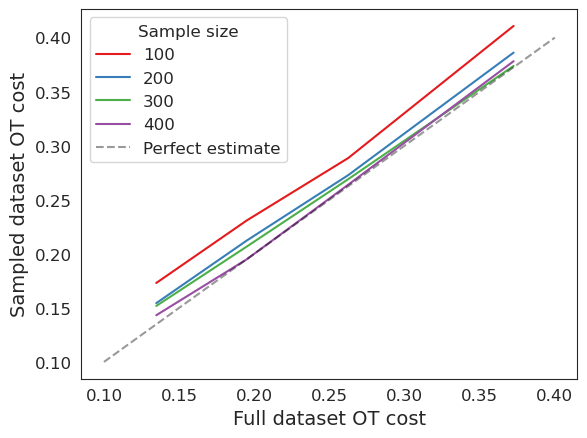

In [51]:
sns.set_style("white")
sns.lineplot(data = melt_df, x = 'True', y = 'Estimated', hue = 'sample_size', palette='Set1')
plt.plot([0.1, 0.4], [0.1, 0.4], linestyle = '--', color = 'black', alpha = 0.4, label = 'Perfect estimate')
plt.xlabel('Full dataset OT cost', fontsize = 14)
plt.ylabel(f'Sampled dataset OT cost', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Sample size', fontsize = 12, title_fontsize = 12)
plt.savefig(f'{RESULTS_DIR}/weather.pdf')
plt.show()



## EMNIST

In [3]:
def loadData(name, indices):
    ##load data
    data = pd.read_csv(f'{ROOT_DIR}/data/EMNIST/{name}.csv', sep = ' ', names = [i for i in range(785)])
    ##get X and label
    if len(indices) < 3:
        load_size = len(indices) * 15
    elif len(indices) == 3:
        load_size = len(indices) * 27
    else:
        load_size = len(indices) * 40
    
    y = data.iloc[:load_size,-1]
    X = data.iloc[:load_size,:-1]
    return X,y

In [4]:
def addNoise(data, columns = 'all', mean = 0, sigma = 1):
    if columns == 'all':
        k = data.shape[1]
    else:
        k = len(columns)
    n = data.shape[0]
    np.random.seed(1331)
    noise = np.random.normal(mean, sigma, size = n*k).reshape(n,k)

    if columns == 'all':
        data_ = copy.deepcopy(data)
        data_ += noise
    else:
         data_ = copy.deepcopy(data)
         data_.iloc[:, columns] += noise
    return data_


In [5]:
def sampler(data, label, num = 300):
    data_, label_  = {}, {}
    for i in data:
        idx = np.random.choice(np.arange(data[i].shape[0]), num, replace=False)
        data_[i] = data[i][idx]
        label_[i] = label[i][idx].reshape(1,-1)[0]
    return data_, label_


In [6]:
def pull_labels(images, labels, indices, size):
    ##get indices for x, i
    indices_x =  getIndices(indices[0], size)
    indices_i =  getIndices(indices[1], size)


    ##randomly permute and take fixed size of points
    #np.random.seed(10)
    indices_x = np.random.permutation(indices_x)
    indices_i = np.random.permutation(indices_i)
    
    ind_1 = indices_x[:size]
    ind_2 = indices_i[:size]

    ##pull data and labels
    X1 = images[ind_1] / 255
    X2 = images[ind_2] / 255
    y1 = labels[ind_1]
    y2 = labels[ind_2]

    ## reshape
    X1 = X1.reshape((size, 28*28))
    X2 = X2.reshape((size, 28*28))

    return {"1": X1, "2": X2}, {"1":y1, "2":y2}

In [7]:
def getIndices(indices, size):
    ##get number of indices
    num_ind = len(indices)
    ##get number per label
    num_per_label = int(size / num_ind) + 10
    indices_use = []
    ## loop through and pull indices
    for ind in indices:
        indices_use.extend(np.where(np.isin(labels_full, ind) == True)[0][:num_per_label])
    return indices_use

In [8]:
## load dataset
images_full, labels_full = extract_training_samples('byclass')

In [9]:
importlib.reload(ot)
costs = [0.07, 0.1, 0.2, 0.3, 0.4]
indices =  [
            [[x for x in range(7)], [x for x in range(7)]],
            [[1,2,3,4,5,6,7,8], [1,2,3,4,5,6,7,9]],
            [[1,2,3,4,5,7,9], [1,2,3,4,5,6,8]],
            [[x for x in range(10, 25)], [x for x in range(36, 51)]],
            [[x for x in range(10, 22)], [x for x in range(50, 62)]]
            ]

nums = [250, 400, 900, 999]

results = {}
for ind, ac in zip(indices, costs):
    results[ac] = {}
    for num in nums:
        importlib.reload(ot)
        data, label = pull_labels(images_full, labels_full, ind, size = 5000)
        data_, label_ = sampler(data, label, num = num)
        cost = ot.EMNIST_OTCost_label(data_, label_, private = False)
        results[ac][num] = round(cost,2)

cost: 0.0779817640
cost: 0.0701178727
cost: 0.0582111174
cost: 0.0666061840
cost: 0.1116440633
cost: 0.1078215713
cost: 0.1034656815
cost: 0.1052020839
cost: 0.1858824495
cost: 0.1942632818
cost: 0.1799142124
cost: 0.1806510919
cost: 0.2762853733
cost: 0.2961580680
cost: 0.3395095081
cost: 0.3462941011
cost: 0.3039705289
cost: 0.3358565705
cost: 0.3849108341
cost: 0.3907930609


In [10]:
df = pd.DataFrame.from_dict(results, orient = 'index')
melt_df = pd.melt(df.iloc[:,:-1])
##taken true from full dataset
melt_df['True'] = list(df.iloc[:,-1].values) * df.iloc[:,:-1].shape[1]
##rename columns
melt_df.columns = ['sample_size', 'Estimated', 'True']

In [11]:
melt_df.to_csv(f'{RESULTS_DIR}/emnist_data.csv')

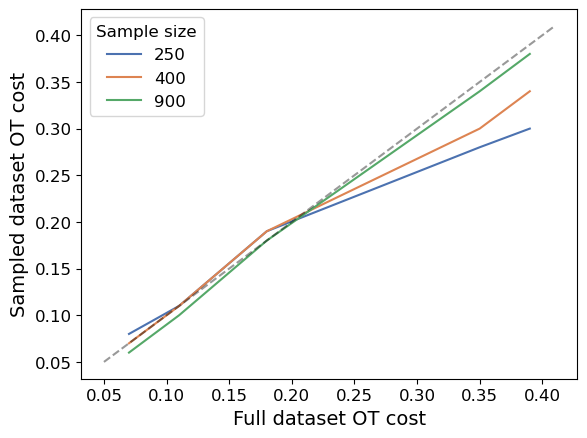

In [28]:
sns.lineplot(data = melt_df, x = 'True', y = 'Estimated', hue = 'sample_size', palette = 'deep')
plt.plot([0.05, 0.41], [0.05, 0.41], linestyle = '--', color = 'black', alpha = 0.4)
plt.xlabel('Full dataset OT cost', fontsize = 14)
plt.ylabel(f'Sampled dataset OT cost', fontsize = 14)
plt.legend(title = 'Sample size', fontsize = 12, title_fontsize = 12)
#plt.title(f'EMNIST, OT cost: True vs. Sample estimate')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(f'{RESULTS_DIR}/EMNIST_sample.pdf')
plt.show()